In [ ]:
!pip install tensorflow-gpu==2.3.1
!pip install ktrain

     |████████████████████████████████| 320.4MB 49kB/s 
     |████████████████████████████████| 20.1MB 11.8MB/s 
     |████████████████████████████████| 460kB 49.0MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0


     |████████████████████████████████| 25.3MB 1.5MB/s 
     |████████████████████████████████| 6.8MB 35.8MB/s 
     |████████████████████████████████| 983kB 39.3MB/s 
     |████████████████████████████████| 266kB 50.4MB/s 
     |████████████████████████████████| 1.9MB 42.7MB/s 
     |████████████████████████████████| 1.2MB 40.7MB/s 
     |████████████████████████████████| 471kB 39.5MB/s 
     |████████████████████████████████| 890kB 36.6MB/s 
     |████████████████████████████████| 3.2MB 48.8MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.1-cp37-none-any.whl size=25277418 sha256=effef36f2224507502fcfe21c0f8953748ecc3af185da6ce68734524a9a6d06f
  Stored in directory: /root/.cache/pip/wheels/5f/e6/26/e587644c4f5bd1a32d24d7bda0b132f8f2d4dfbe0bca62fe70
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=f256c156118b9c66894af20b74f399bf84dfaa6c49135ee1c1e6269aa994a41a
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import pandas as pd
import ktrain
from ktrain import text

In [ ]:
!gdown --id 1s-8A8sF7b23Tb9Myoc_3DTl6YXLpL17L

Downloading...
From: https://drive.google.com/uc?id=1s-8A8sF7b23Tb9Myoc_3DTl6YXLpL17L
To: /content/lab4_train.csv
100% 331k/331k [00:00<00:00, 94.5MB/s]


In [ ]:
df = pd.read_csv('/content/lab4_train.csv')
df = df.dropna()
df.shape

(3156, 4)

In [ ]:
df

,id,text,aspectCategory,polarity
0,3121,But the staff was so horrible to us.,service,negative
1,2777,"To be completely fair, the only redeeming fact...",food,positive
2,2777,"To be completely fair, the only redeeming fact...",anecdotes/miscellaneous,negative
3,1634,"The food is uniformly exceptional, with a very...",food,positive
4,2534,Where Gabriela personaly greets you and recomm...,service,positive
...,...,...,...,...
3151,2853,I would highly recommend this place to everyon...,anecdotes/miscellaneous,positive
3152,1163,The service is fantastic.,service,positive
3153,216,I recommend that you try this hidden spot whic...,anecdotes/miscellaneous,positive
3154,1109,The garlic mashed potatoes are hands down the ...,food,positive


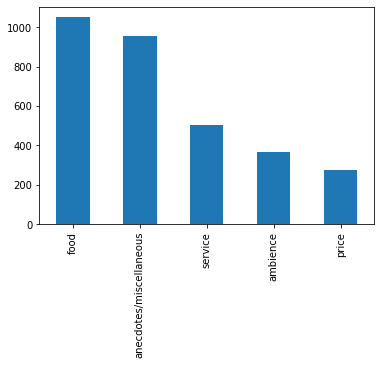

In [ ]:
df.aspectCategory.value_counts().plot.bar()

In [ ]:
df["aspectCategory"] = df["aspectCategory"].replace({'service': 0, 'food': 1, 'anecdotes/miscellaneous':2,'price':3,'ambience':4})

In [ ]:
def StratifiedSplit(dat,label_name,split_ratio):
  total_row=dat.count()[0]
  labels=dat[label_name].unique()
  ratio_dict={}
  for i in labels:
    ratio_dict[i]=dat.where(dat[label_name]==i).dropna().count()[0]/total_row
  num_sample=int(total_row*split_ratio)
  test_df=pd.DataFrame(columns=dat.columns)
  train_df=pd.DataFrame(columns=dat.columns)
  for i in labels:
    num_sample_label =int(num_sample*ratio_dict[i])
    dat_sm=dat.where(dat[label_name]==i).dropna()
    dat_sm=dat_sm.sample(frac=1)
    msk = np.random.rand(dat_sm.count()[0]) < (num_sample_label/dat_sm.count()[0])
    test_df=test_df.append(dat_sm[msk])
    train_df=train_df.append(dat_sm[~msk])
  return (train_df, test_df)

In [ ]:
import numpy as np
train, test=StratifiedSplit(df,"aspectCategory",0.2)
x_train = train["text"].values.tolist()
y_train =  train["aspectCategory"].values.tolist()
x_test = test["text"].values.tolist()
y_test = test["aspectCategory"].values.tolist()

In [ ]:
y_train

In [ ]:
x_train

In [ ]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=['0','1','2','3','4'],
                                                                       preprocess_mode='bert',
                                                                       ngram_range=1,maxlen=350)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:605: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 350
done.


In [ ]:
y_train

In [ ]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 350)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 350)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 350, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 350, 768)     1536        Input-Segment[0][0]              
_______________________________________________________________________________________

In [ ]:
from IPython.display import Image, display_png
from keras.utils import to_categorical, plot_model
plot_model(model, show_shapes=True,to_file='model.png')
display_png(Image('model.png'))

In [ ]:
hist = learner.fit_onecycle(2e-5, 2) 



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
422/422 [==============================] - 6801s 16s/step - loss: 1.2008 - accuracy: 0.5445
Epoch 2/2
422/422 [==============================] - 6783s 16s/step - loss: 0.7122 - accuracy: 0.7194


In [ ]:
from tqdm import tqdm
predictor = ktrain.get_predictor(learner.model, preproc)
df_test = pd.read_csv('/content/lab4_test.csv')
data = df_test['text'].values.tolist()
pred_y = []
for i in tqdm(range(len(data))):
    pred_y.append(predictor.predict(data[i]))

100%|██████████| 461/461 [06:54<00:00,  1.11it/s]


In [ ]:
eva_test = df_test.drop(columns=['text','id'])
eva_test['aspectCategory'] = pred_y
eva_test['aspectCategory'] = eva_test['aspectCategory'].replace({'0':'service' , '1':'food', '2':'anecdotes/miscellaneous','3':'price','4':'ambience'})
eva_test.to_csv('eva_test.csv',index=False)

In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 350
done.


In [ ]:
model.load_weights('/content/drive/MyDrive/aspect_model_weights.h5')

In [ ]:
from tqdm import tqdm
predictor = ktrain.get_predictor(learner.model, preproc)
df_train = pd.read_csv('/content/lab4_train.csv')
data = df_train['text'].values.tolist()
pred_y_train = []
for i in tqdm(range(len(data))):
    pred_y_train.append(predictor.predict(data[i]))

100%|██████████| 3156/3156 [1:14:34<00:00,  1.42s/it]


In [ ]:
eva_train = df_train.drop(columns=['text','id'])
eva_train['aspectCategory'] = pred_y_train
eva_train['aspectCategory'] = eva_train['aspectCategory'].replace({'0':'service' , '1':'food', '2':'anecdotes/miscellaneous','3':'price','4':'ambience'})
eva_train.to_csv('eva_train.csv',index=False)

In [ ]:
model.save('aspect_model.h5')  # creates a HDF5 file 'my_model.h5'
model.save_weights('aspect_model_weights.h5')

In [ ]:
data2=pd.read_csv('/content/eva_test.csv')
data1=pd.read_csv('/content/eva_test (1).csv')
data1['aspectCategory']=data2['aspectCategory']
data1.to_csv('test_pred.csv',index=False)

In [ ]:
# res_df=pd.DataFrame.from_dict(res_dict)
# out=[i.argmax() for i in res_df["aspectCategory"]]